In [1]:
# given a set of x's and y's from a polynomial
# can we train a NN to model the function?

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import importlib
import numpy as np
import viz

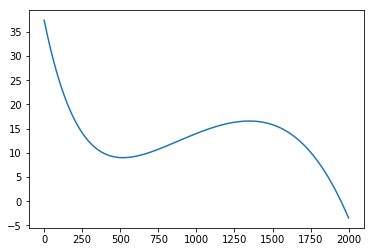

In [13]:
def rand_poly(N=7):
    xs = np.arange(-1.0, 1.0, 0.001)
    coeffs = np.array([np.random.uniform(-1.0, 1.0)*20 for _ in range(N)])
    ys = np.polynomial.polynomial.polyval(xs, coeffs)
    return xs, ys
    ys[:5]
    
xs, ys = rand_poly()
plt.plot(ys)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
import random

(1612,)


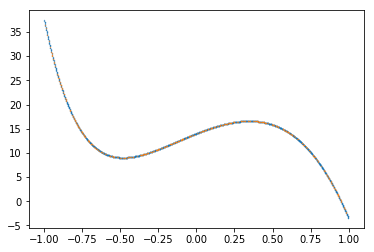

In [15]:
def train_test_split(xs, ys):
    xs_chunks = xs
    ys_chunks = ys
    L = len(xs)
    sides = [int(random.random() < 0.2) for _ in range(L)]
    x_train, x_test = [], []
    y_train, y_test = [], []
    for index, side in enumerate(sides):
        if side == 0:
            x_train.append(xs_chunks[index])
            y_train.append(ys_chunks[index])
        else:
            x_test.append(xs_chunks[index])
            y_test.append(ys_chunks[index])
    return [np.array(a) for a in [x_train, y_train, x_test, y_test]]

x_train, y_train, x_test, y_test = train_test_split(xs, ys)

plt.scatter(x_train, y_train, s=0.1)
plt.scatter(x_test, y_test, s=0.1)
print(x_train.shape)

In [16]:
i, j = 50, 0
xs[i], x_train[j], x_test[j], ys[i], y_train[j], y_test[j]

(-0.95, -1.0, -0.994, 30.45186925752232, 37.420074297826744, 36.50654293083975)

In [18]:
model = Sequential()
model.add(Dense(10, input_dim=1))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='rmsprop', metrics=['mae', 'accuracy'])

history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=32,
                    epochs=200, 
                    verbose=0,
                    shuffle=True)

# model.summary()


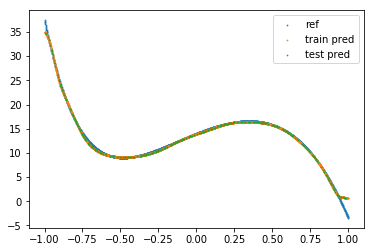

In [21]:
yh = model.predict(x_train)[:,0]
plt.scatter(x_train, y_train, label='ref', s=0.5)
plt.scatter(x_train, yh, label='train pred', s=0.5)
yh = model.predict(x_test)[:,0]
plt.scatter(x_test, yh, label='test pred', s=0.5)
_ = plt.legend()

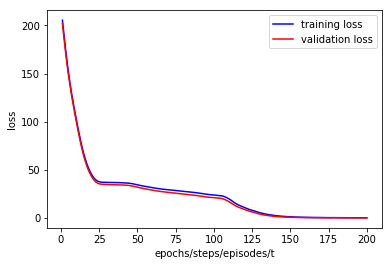

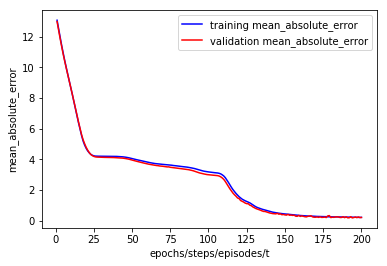

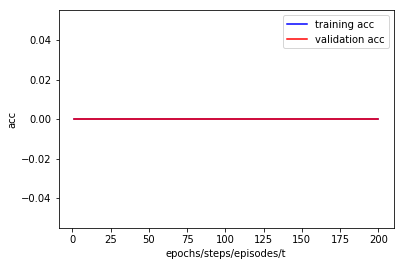

In [22]:
importlib.reload(viz)
for fig in viz.Plotter().plot_perf(history):
    display(fig)